# Q.1  50_Startups

In [67]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [68]:
#Import Data
data = pd.read_csv('50_Startups.csv')
data.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [70]:
#Data Description
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [71]:
#check for missing values
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

- Inferences -  There are no null values

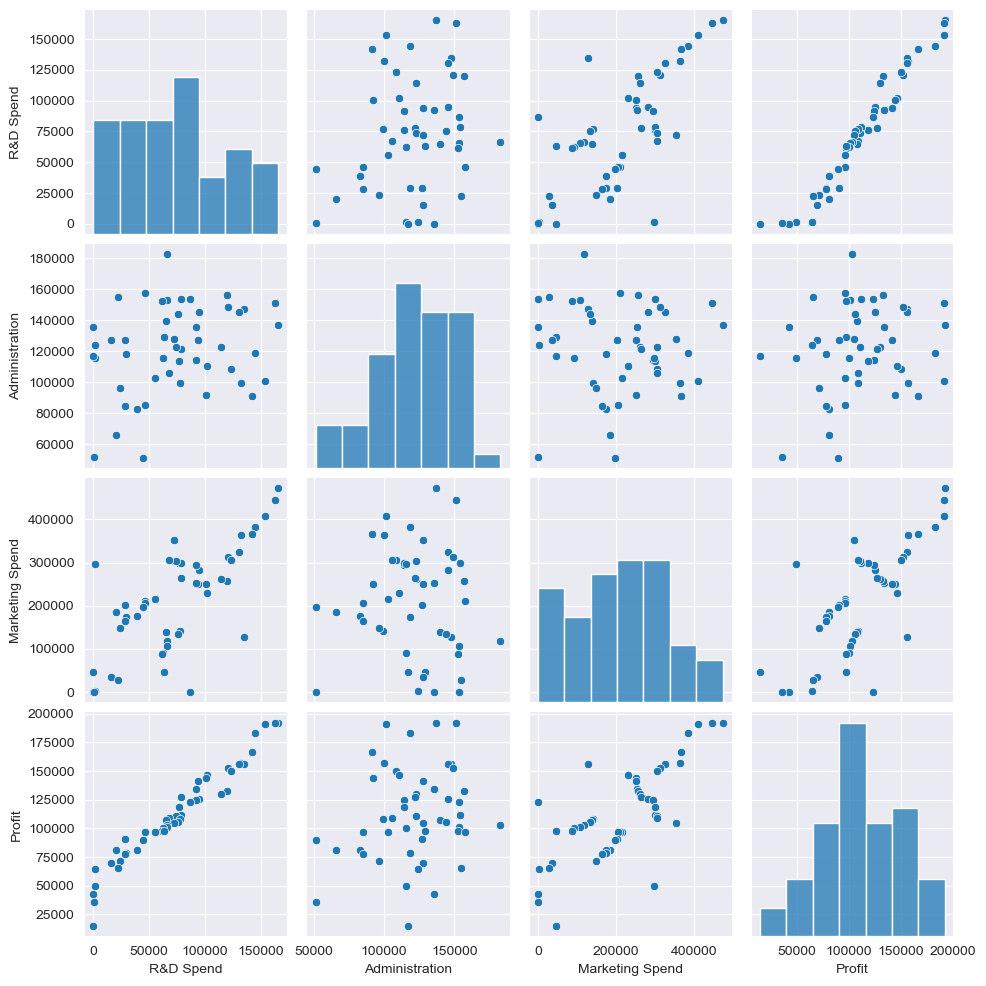

In [72]:
#Visualization
sns.pairplot(data)

In [73]:
#Renaming the Columns
data1=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data1.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [74]:
#Correlation Analysis
data1.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

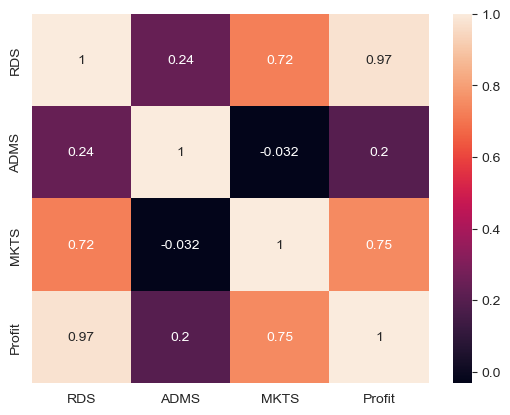

In [75]:
sns.heatmap(data1.corr() , annot =True)

In [76]:
#Model Building
import statsmodels.formula.api as smf

In [77]:
data1.columns

Index(['RDS', 'ADMS', 'MKTS', 'State', 'Profit'], dtype='object')

In [78]:
model = smf.ols("Profit~RDS+ADMS+MKTS", data=data1).fit()
model

In [79]:
#Coefficients
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [80]:
#t and p-Values
print(model.tvalues,'\n',model.pvalues)

Intercept     7.626218
RDS          17.846374
ADMS         -0.525507
MKTS          1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
ADMS         6.017551e-01
MKTS         1.047168e-01
dtype: float64


In [81]:
#R squared values
print(model.rsquared)
model.rsquared_adj

0.9507459940683246


0.9475337762901719

- Inferences - Model accuracy is 94.75%

In [82]:
#Model Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        11:48:24   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear Regression Models

In [83]:
#Profit and ADMS model
adms_model = smf.ols("Profit~ADMS", data = data1).fit()
adms_model

In [84]:
adms_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 16 Feb 2023   Prob (F-statistic):              0.162
Time:                        11:48:24   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADMS           0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
#Profit and MKTS model
mkts_model = smf.ols("Profit~MKTS", data = data1).fit()
mkts_model

In [86]:
mkts_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           4.38e-10
Time:                        11:48:24   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MKTS           0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
#Profit, ADMS and MKTS model
adms_mkts_model= smf.ols("Profit~ADMS+MKTS", data = data1).fit()
adms_mkts_model

In [88]:
adms_mkts_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           2.50e-10
Time:                        11:48:25   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADMS           0.3237      0.131      2.468      0.017       0.060       0.588
MKTS           0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [89]:
data1.columns

Index(['RDS', 'ADMS', 'MKTS', 'State', 'Profit'], dtype='object')

In [90]:
r_rds = smf.ols('RDS~ADMS+MKTS',data=data1).fit().rsquared
v_rds = 1/(1-r_rds)

r_adms = smf.ols('ADMS~RDS+MKTS',data=data1).fit().rsquared
v_adms = 1/(1-r_adms)

r_mkts = smf.ols('MKTS~RDS+ADMS',data=data1).fit().rsquared
v_mkts = 1/(1-r_mkts)

In [91]:
vif = pd.DataFrame({
    'Feature_names' : ['RDS','ADMS','MKTS'],
    'VIF' : [v_rds,v_adms,v_mkts]
})

vif

,Feature_names,VIF
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


- Inferences - Since No value of VIF is greater than 20 , we can say that there is no collinearity problem. 
 
  So we shall consider all columns for building the model



In [92]:
#Residual Analysis
import statsmodels.api as sm

<function matplotlib.pyplot.show(close=None, block=None)>

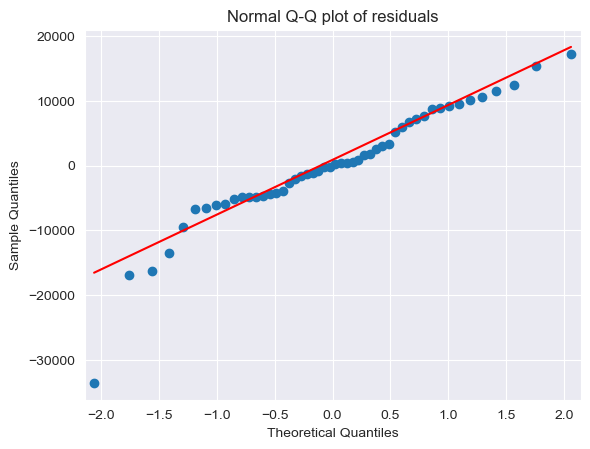

In [93]:

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show

In [94]:
list(np.where(model.resid<-30000))

# outlier value exists below -3000 so that we use (model.resid<-30000)

[array([49], dtype=int64)]

In [95]:
# Residual plot for Homoscedasticity or Heteroscedasticity
def get_standardized_values(vals):
    return(vals - vals.mean())/vals.std()
#get_standardized_values(data1)

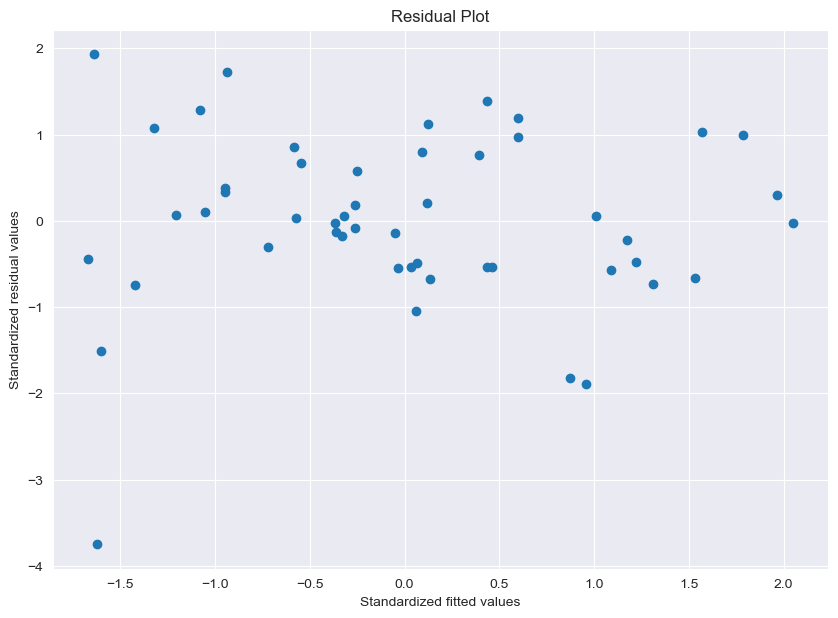

In [96]:
plt.figure(figsize=(10,7))
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residual values")
plt.show()

# Residual Vs Regressors

eval_env: 1


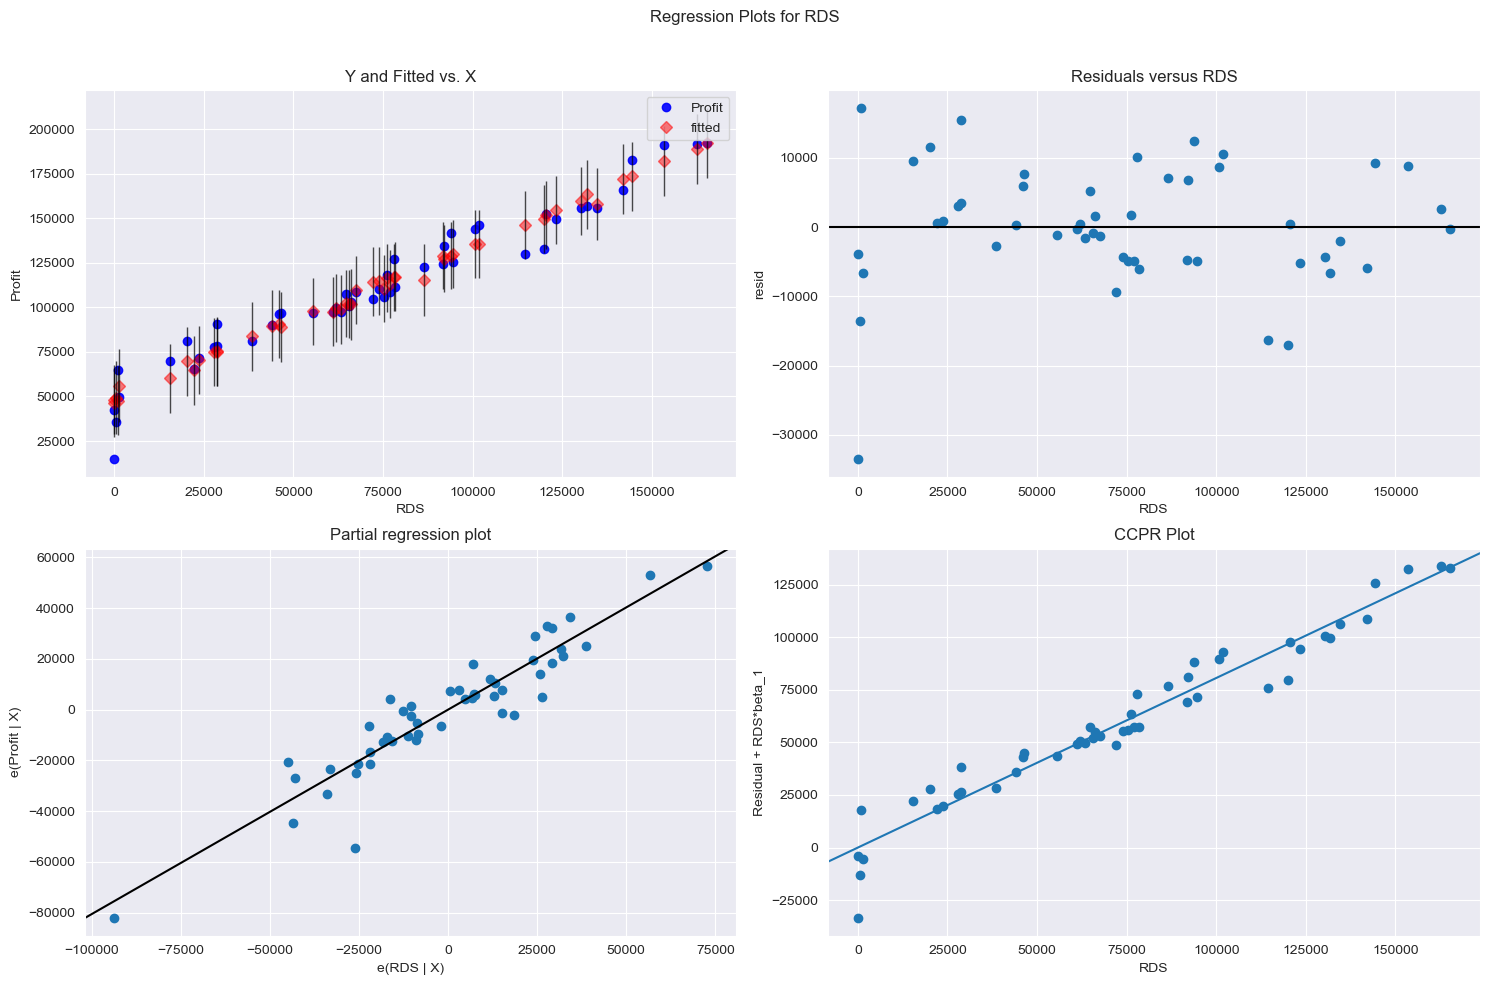

In [97]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"RDS", fig = fig)
plt.show()

eval_env: 1


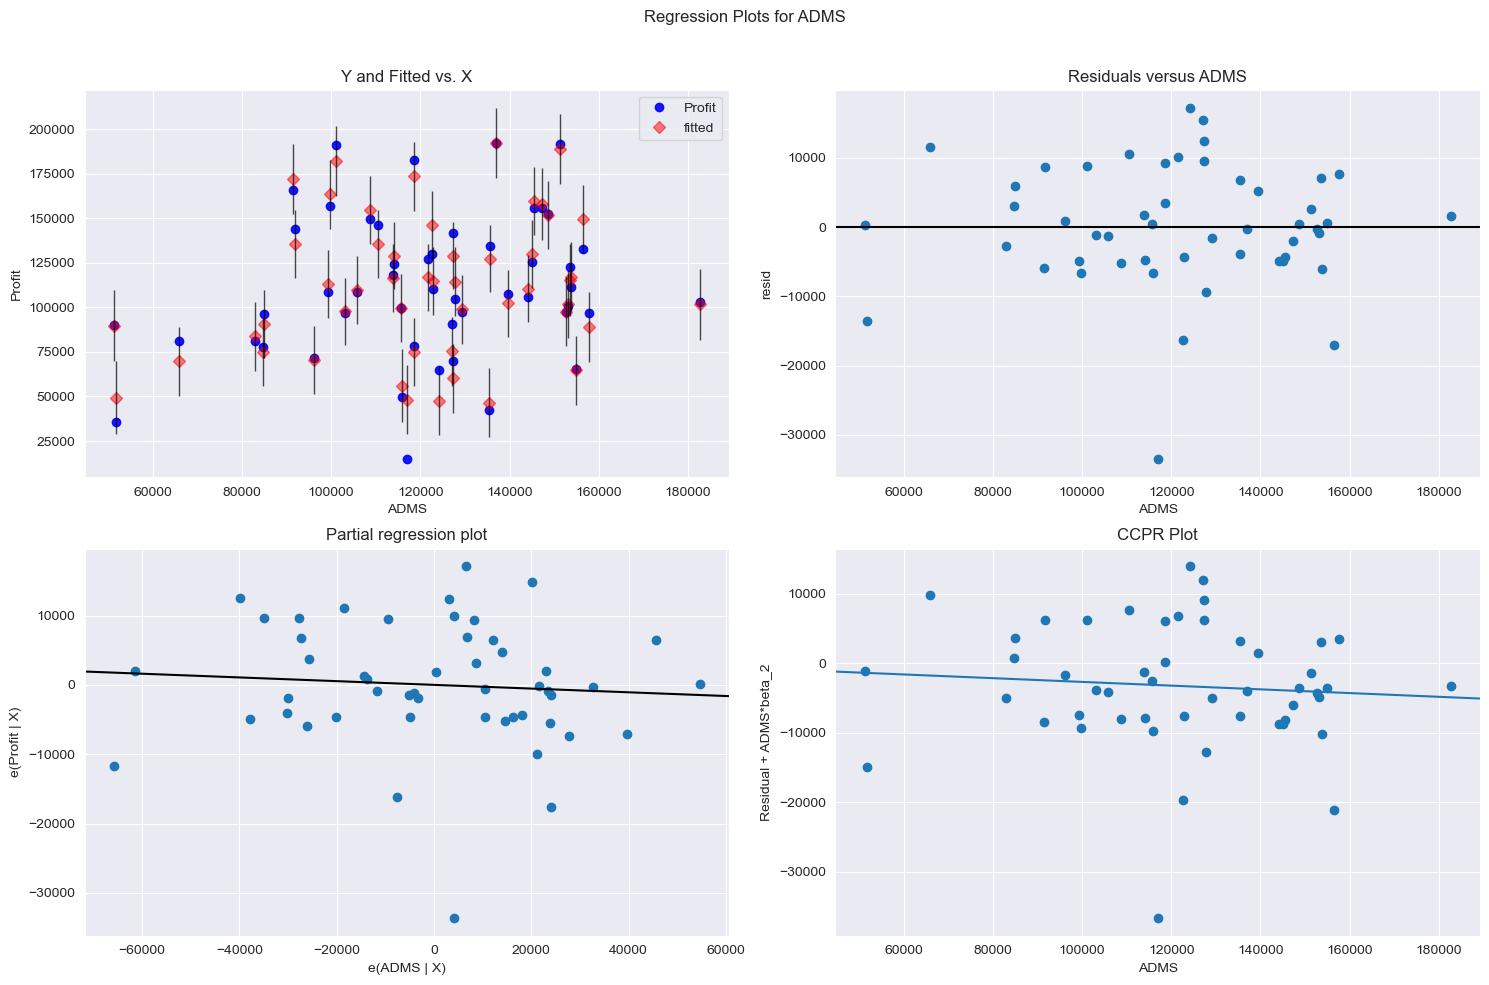

In [98]:
fig = plt.figure(figsize = (15,10))
fig =  sm.graphics.plot_regress_exog(model, "ADMS", fig = fig) 
plt.show()

eval_env: 1


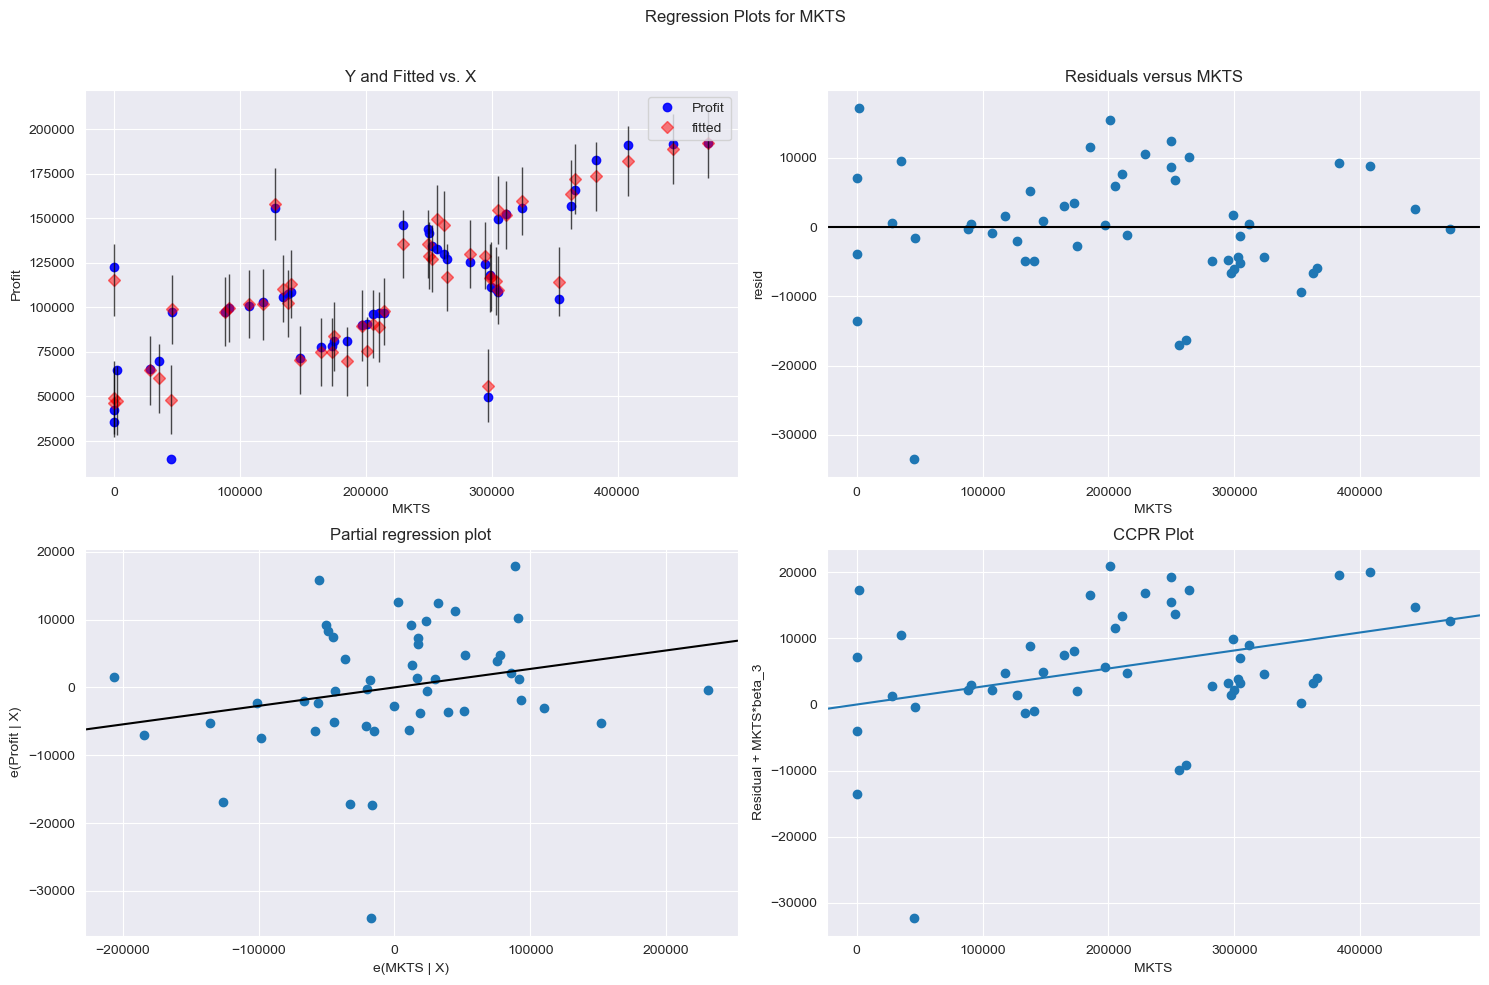

In [99]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model, "MKTS", fig = fig)
plt.show()

# Model Deletion Diagnostics (Checking outliers or influencers)

- There are two techniques.
  
  1. Cook's Distance

  2. Leverage value


# Cook's Distance

- If Cook's Distance > 1, Then it's an outlier.

In [100]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()


In [101]:
(c,_) = model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

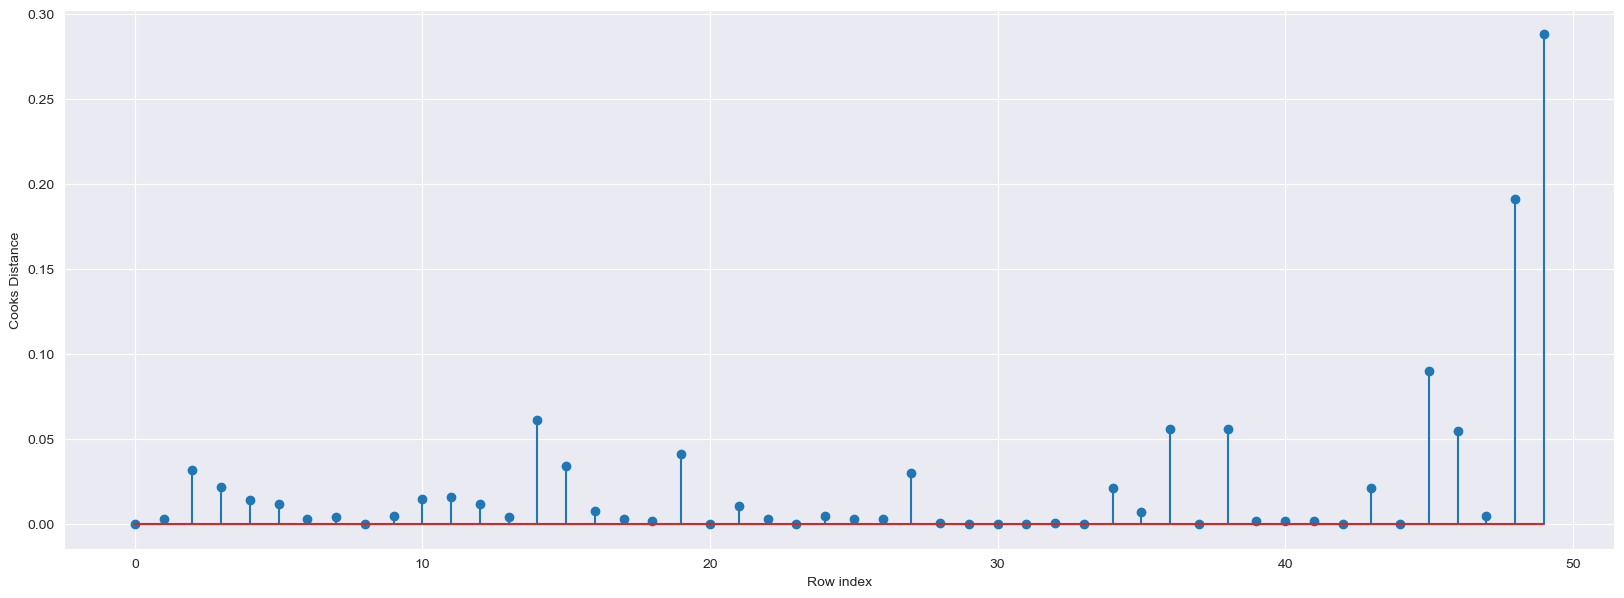

In [102]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [103]:
# Index and value of influencer where c>0.5
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

# Leverage Value

- The points beyond Leverage cutoff value are influencers.

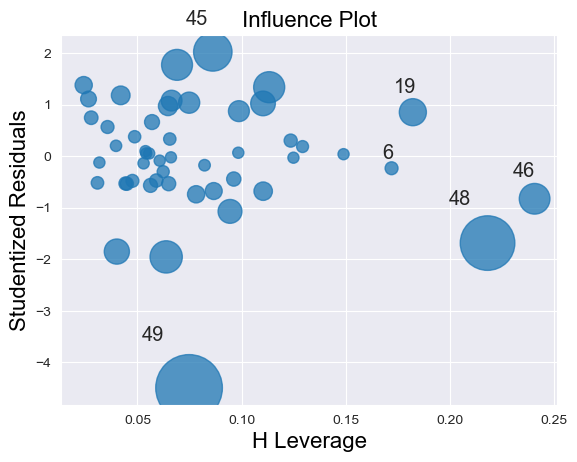

In [104]:
influence_plot(model)
plt.show()

- Leverage_Cutoff Value = 3*(k+1)/n

  Where k = no. of features and
  
        n = no. of datapoints

In [105]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [106]:
data1[data1.index.isin([49])]

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving Model 

- Discard the datapoints which are influencers.

In [107]:
data2=data1.drop(data1.index[49], axis=0).reset_index()
data2.drop(['index'], axis=1, inplace=True)

# Model Building

In [108]:
#Exclude variable "MKTS" and generate R-Squared and AIC values
final_adms = smf.ols('Profit~RDS+ADMS',data = data2).fit()

In [109]:
(final_adms.rsquared, final_adms.aic, final_adms.bic)

(0.9584519070123048, 1022.0654576388338, 1027.7409185331658)

In [110]:
#Exclude variable "ADMS" and generate R-Squared and AIC values
final_mkts= smf.ols('Profit~RDS+MKTS',data = data2).fit()

In [111]:
(final_mkts.rsquared, final_mkts.aic, final_mkts.bic)

(0.9610856807456628, 1018.8564801588338, 1024.5319410531658)

- Comparing above R-Squared and AIC values

  model 'final_mkts' has high R- square and low AIC value 

  Hence include variable 'Mrkt' so that multi collinearity problem would be resolved.

In [112]:
model_influence_mkts = final_mkts.get_influence()
(c_M, _) = model_influence_mkts.cooks_distance

Text(0, 0.5, 'Cooks Distance')

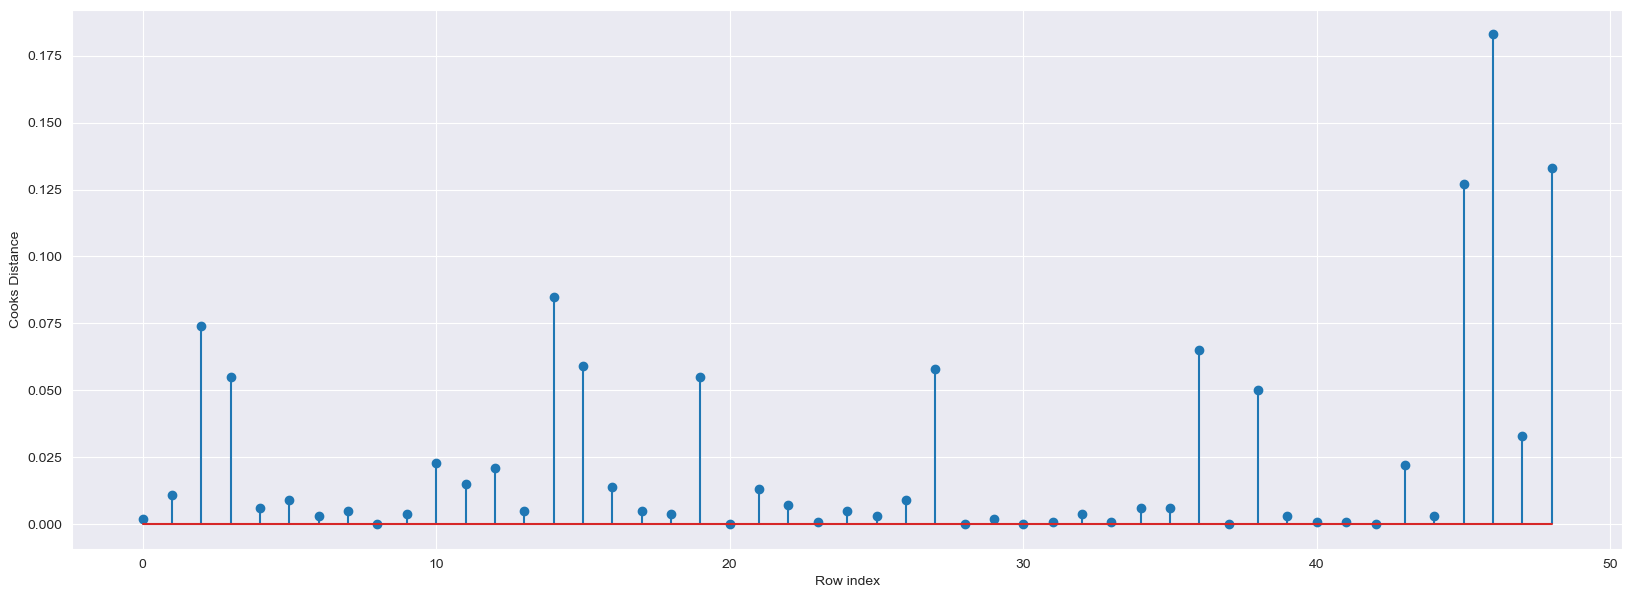

In [113]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c_M,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

- Since the value is < 1 

  we can stop the diagnostic process and finalize the model.

In [114]:
#Check the accuracy of the model
final_mkts= smf.ols('Profit~RDS+MKTS+ADMS',data = data2).fit()

In [115]:
final_mkts.rsquared, final_mkts.aic

(0.9613162435129847, 1020.5652974526367)

# Model Prediction

In [116]:
#New data for prediction
new_data=pd.DataFrame({'RDS':87000,'ADMS':127864,"MKTS":249839},index=[1])
new_data

,RDS,ADMS,MKTS
1,87000,127864,249839


In [117]:
final_mkts.predict(new_data)

1    123969.190148
dtype: float64

In [118]:
final_mkts.predict(data2.iloc[0:4,])

0    190716.676999
1    187537.122227
2    180575.526396
3    172461.144642
dtype: float64

In [119]:
pred_y = final_mkts.predict(data2)

In [120]:
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

# Table containing R^2 value for each prepared model

In [121]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_mkts.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


# Q.2 Toyota corolla

In [122]:
data = pd.read_csv('ToyotaCorolla.csv', encoding= "ISO-8859-1")
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# EDA

In [123]:
data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [124]:
print(data.Doors.unique())
print(data.Gears.unique())
print(data.HP.unique())
print(data.cc.unique())
print(data.Quarterly_Tax.unique())
print(data.Weight.unique())
print(data.Age_08_04.unique())

[3 5 4 2]
[5 6 3 4]
[ 90 192  69 110  97  71 116  98  86  72 107  73]
[ 2000  1800  1900  1600  1400  1598 16000  1995  1398  1300  1587  1975
  1332]
[210 100 185  85  19 234  69 283  64 197 163  72  40]
[1165 1170 1245 1185 1105 1065 1120 1100 1255 1270 1110 1195 1180 1075
 1130 1275 1060 1115 1265 1260 1125 1155 1045 1480 1320 1280 1135 1090
 1150 1085 1160 1205 1084 1140 1095 1025 1119 1080 1121 1615 1067 1040
 1030 1055 1050 1103 1070 1035 1015 1000 1078 1079 1109 1020 1010 1114
 1172 1094 1083]
[23 24 26 30 32 27 25 22 31 28 29 20 19 16 17 11 18 13 14  4  8  7 15 10
 12  9  6  2  1 43 38 40 44 41 37 39 42 35 34 33 36 53 51 54 45 55 48 52
 49 56 50 47 46 58 68 59 62 65 67 64 60 61 66 57 63 73 79 78 74 77 69 80
 76 70 71 75 72]


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [126]:
PR =  data.iloc[:,2]
Age = data.iloc[:,3]
KM =  data.iloc[:,6]
HP =  data.iloc[:,8]
CC =  data.iloc[:,12]
Drs = data.iloc[:,13]
Grs = data.iloc[:,15]
QT =  data.iloc[:,16]
WT =  data.iloc[:,17]
data1 = pd.DataFrame({"Price":PR,"Age":Age,"KM":KM,"HP":HP,"CC":CC,"Drs":Drs,"Grs":Grs,"QT":QT,"WT":WT})
data1

,Price,Age,KM,HP,CC,Drs,Grs,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [127]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Drs     1436 non-null   int64
 6   Grs     1436 non-null   int64
 7   QT      1436 non-null   int64
 8   WT      1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [128]:
data1[data1.duplicated()]

,Price,Age,KM,HP,CC,Drs,Grs,QT,WT
113,24950,8,13253,116,2000,5,5,234,1320


# Correlation Matrix

In [129]:
data1.corr()

,Price,Age,KM,HP,CC,Drs,Grs,QT,WT
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Drs,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Grs,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
WT,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


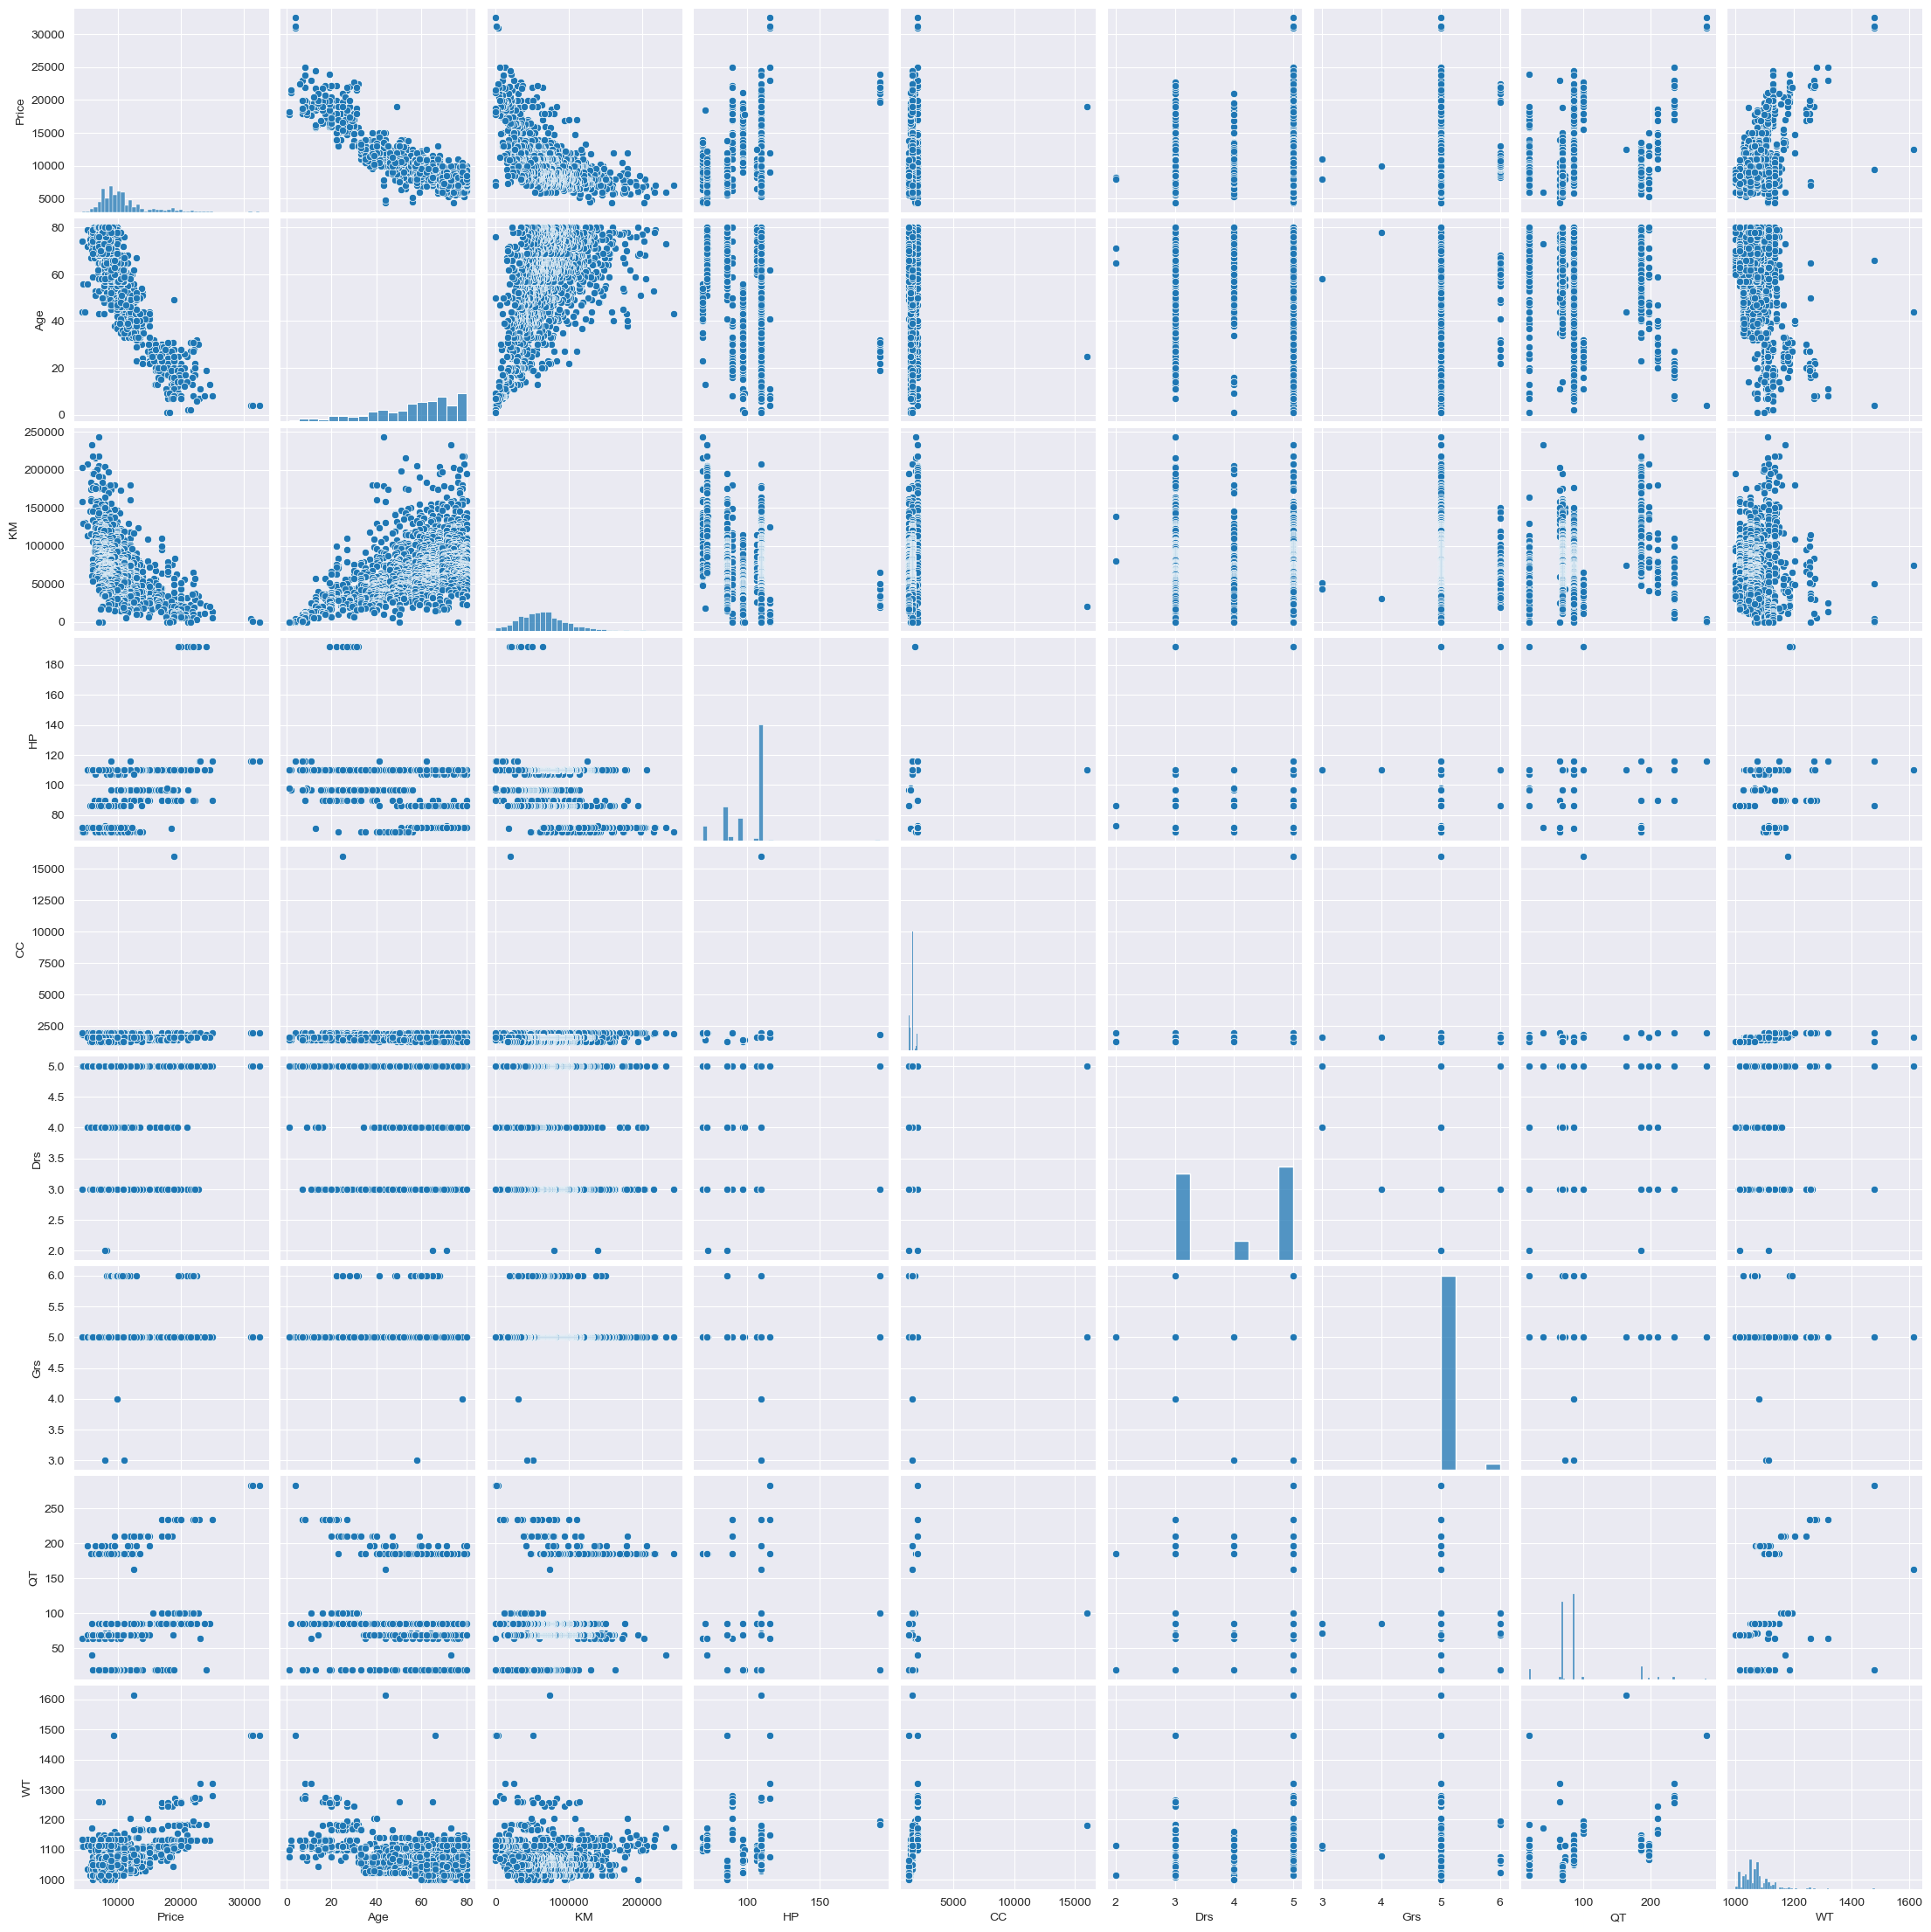

In [130]:
sns.set_style(style="darkgrid")
sns.pairplot(data1)

# Model Building

In [131]:
model = smf.ols("Price~Age+KM+HP+CC+Drs+Grs+QT+WT", data = data1).fit()

In [132]:
#Coefficients
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
CC             -0.121100
Drs            -1.616641
Grs           594.319936
QT              3.949081
WT             16.958632
dtype: float64

In [133]:
# t values and p values:
model.tvalues, model.pvalues

(Intercept    -3.948666
 Age         -46.511852
 KM          -16.621622
 HP           11.241018
 CC           -1.344222
 Drs          -0.040410
 Grs           3.016007
 QT            3.014535
 WT           15.879803
 dtype: float64,
 Intercept     8.241949e-05
 Age          3.354724e-288
 KM            7.538439e-57
 HP            3.757218e-28
 CC            1.790902e-01
 Drs           9.677716e-01
 Grs           2.606549e-03
 QT            2.619148e-03
 WT            2.048576e-52
 dtype: float64)

 - As pvalues for CC and Drs > 0.05
 
   Hence we build SLR and MLR for CC and Drs.

In [134]:
# Coefficient of determination: R Squared values
model.rsquared, model.rsquared_adj

(0.8637627463428192, 0.8629989775766963)

-  R squared adjacent value is = 0.86% 

   Hence we can say model is good.

# Simple Linear regression Models

In [135]:
cc_model =  smf.ols("Price~CC", data=data1).fit()
cc_model.tvalues , cc_model.pvalues

(Intercept    24.694090
 CC            4.824822
 dtype: float64,
 Intercept    1.766912e-112
 CC            1.550808e-06
 dtype: float64)

In [136]:
drs_model = smf.ols("Price~Drs", data = data1).fit()
drs_model.tvalues, drs_model.pvalues


(Intercept    19.258097
 Drs           7.141657
 dtype: float64,
 Intercept    1.094732e-73
 Drs          1.461237e-12
 dtype: float64)

In [137]:
cc_drs_model =  smf.ols("Price~Drs+CC", data = data1).fit()
cc_drs_model.tvalues, cc_drs_model.pvalues

(Intercept    12.620704
 Drs           6.816153
 CC            4.340400
 dtype: float64,
 Intercept    1.056885e-34
 Drs          1.373469e-11
 CC           1.521992e-05
 dtype: float64)

# Calculating VIF

In [138]:
rsq_Age = smf.ols('Age~KM+HP+CC+Drs+Grs+QT+WT', data = data1).fit().rsquared
vif_Age = 1/(1-rsq_Age)
rsq_KM = smf.ols('KM~HP+CC+Drs+Grs+QT+WT+Age', data = data1).fit().rsquared
vif_KM = 1/ (1-rsq_KM)
rsq_HP = smf.ols('HP~CC+Drs+Grs+QT+WT+Age+KM', data = data1).fit().rsquared
vif_HP = 1/(1-rsq_HP)
rsq_CC = smf.ols('CC~Drs+Grs+QT+WT+Age+KM+HP', data = data1).fit().rsquared
vif_CC = 1/(1-rsq_CC)
rsq_Drs = smf.ols('Drs~Grs+QT+WT+Age+KM+HP+CC', data = data1).fit().rsquared
vif_Drs = 1/ (1-rsq_Drs)
rsq_Grs = smf.ols('Grs~QT+WT+Age+KM+HP+CC+Drs', data = data1).fit().rsquared
vif_Grs = 1/(1-rsq_Grs)
rsq_QT = smf.ols('QT~WT+Age+KM+HP+CC+Drs+Grs', data = data1).fit().rsquared
vif_QT = 1/(1-rsq_QT)
rsq_WT = smf.ols('WT~Age+KM+HP+CC+Drs+Grs+QT', data = data1).fit().rsquared
vif_WT = 1/ (1-rsq_WT)



d = {'Variables': ['Age','KM','HP','CC','Drs','Grs','QT','WT'], 'VIF': [vif_Age,vif_KM,vif_HP,vif_CC,vif_Drs,vif_Grs,vif_QT,vif_WT]}
d1 = pd.DataFrame(d)
print(d1)

  Variables       VIF
0       Age  1.884620
1        KM  1.756905
2        HP  1.419422
3        CC  1.163894
4       Drs  1.156575
5       Grs  1.098723
6        QT  2.311431
7        WT  2.516420


- Inferences - Since No value of VIF is greater than 20 , we can say that there is no     collinearity problem. 
 
  So we shall consider all columns for building the model


# Residual Analysis

In [139]:
model = smf.ols("Price~Age+KM+HP+CC+Drs+Grs+QT+WT", data = data1).fit()

Text(0.5, 1.0, 'Normal Q-Q Plot of residual')

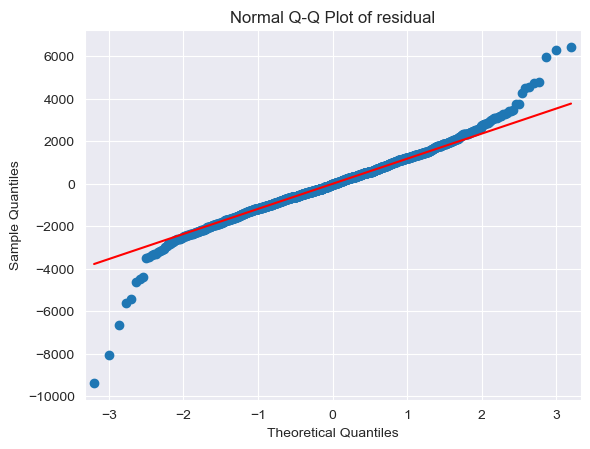

In [140]:
qqplot = sm.qqplot(model.resid, line = 'q')
plt.title("Normal Q-Q Plot of residual")

In [141]:
print(list(np.where(model.resid<-7000))) 

# outlier value exists below -7000 so that we use (model.resid<-70000)

print(list(np.where(model.resid>5000))) 

# outlier value exists below 5000 so that we use (model.resid>50000)

[array([221, 601], dtype=int64)]
[array([109, 147, 523], dtype=int64)]


In [142]:
# Residual plot for Homoscedasticity or Heteroscedasticity

def get_standardized_values(vals):
    return(vals - vals.mean())/vals.std()

#get_standardized_values(data1)

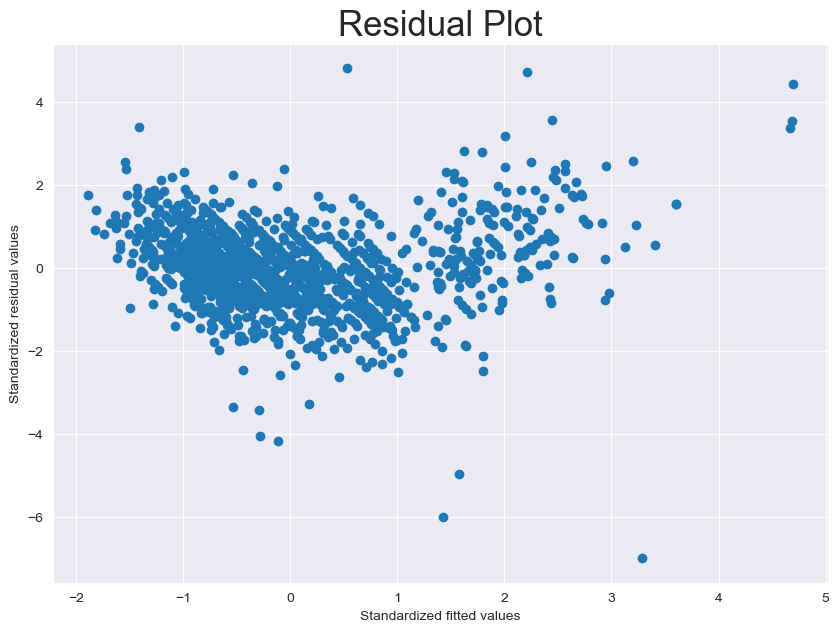

In [143]:
plt.figure(figsize=(10,7))
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot", size=25)
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residual values")
plt.show()

#  Residual Vs Regressors

eval_env: 1


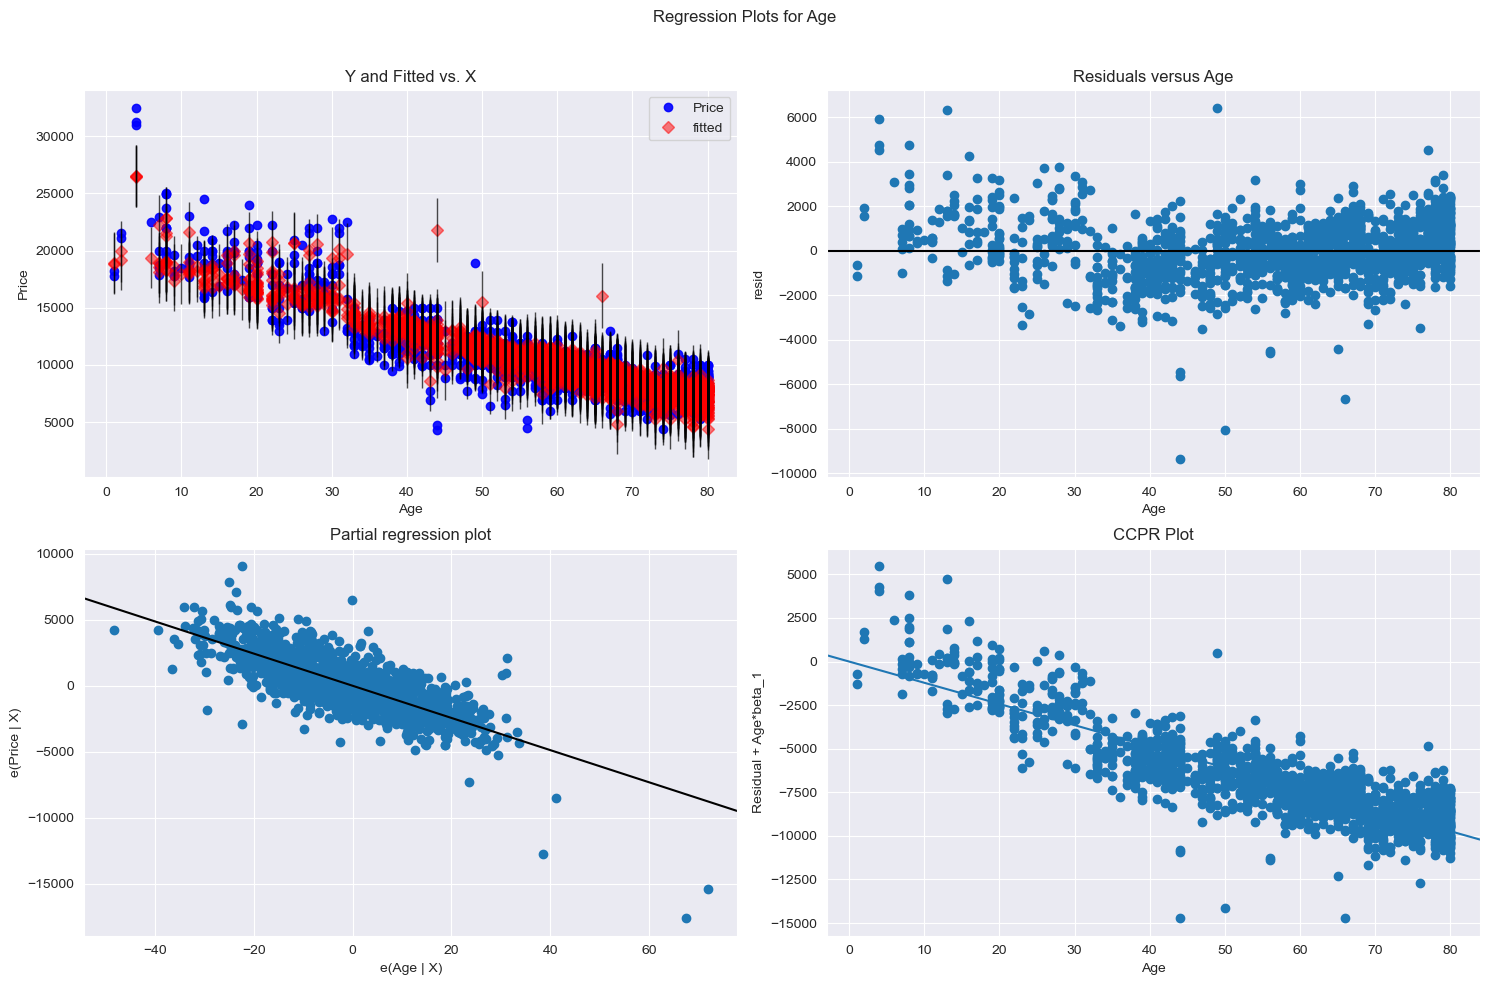

In [144]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"Age", fig = fig)
plt.show()

eval_env: 1


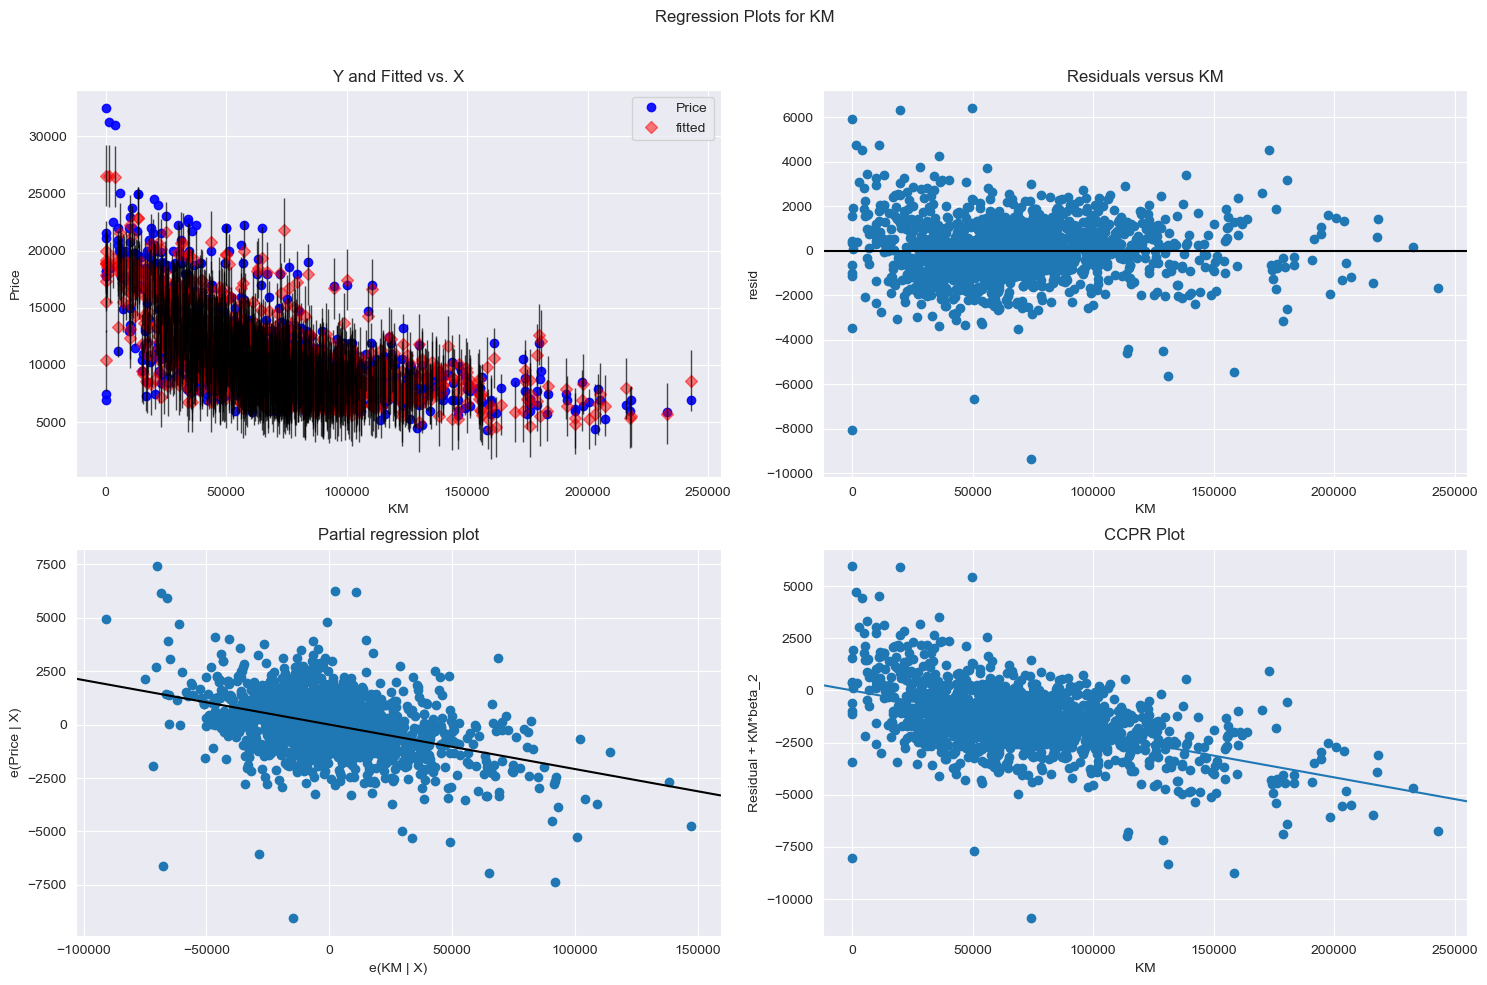

In [145]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"KM", fig = fig)
plt.show()

eval_env: 1


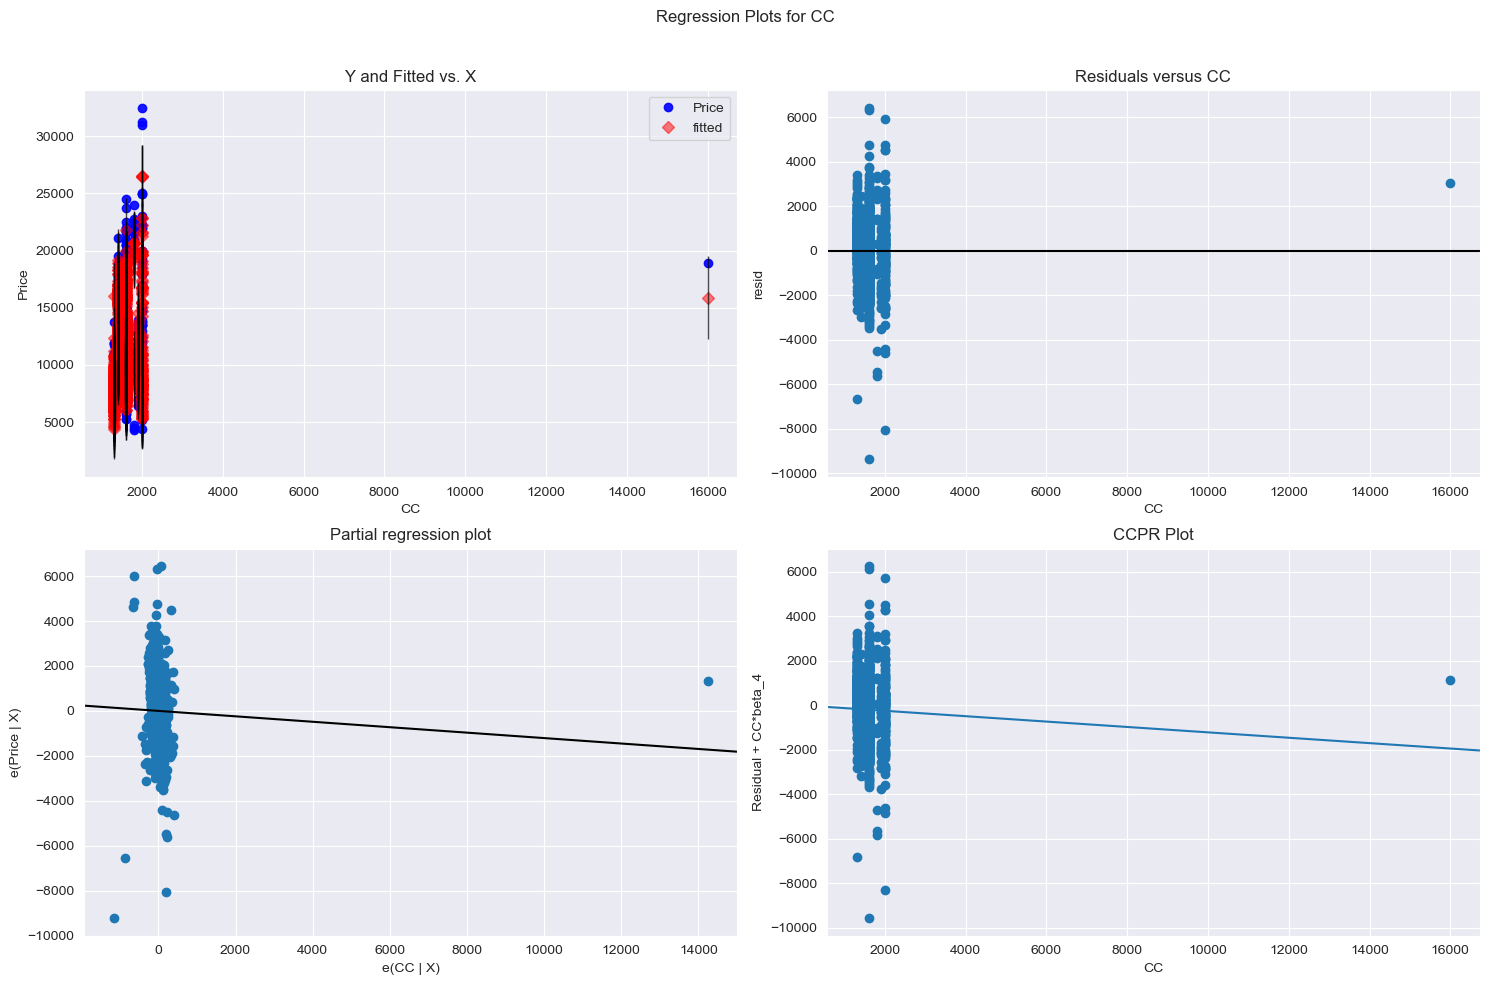

In [146]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"CC", fig = fig)
plt.show()

eval_env: 1


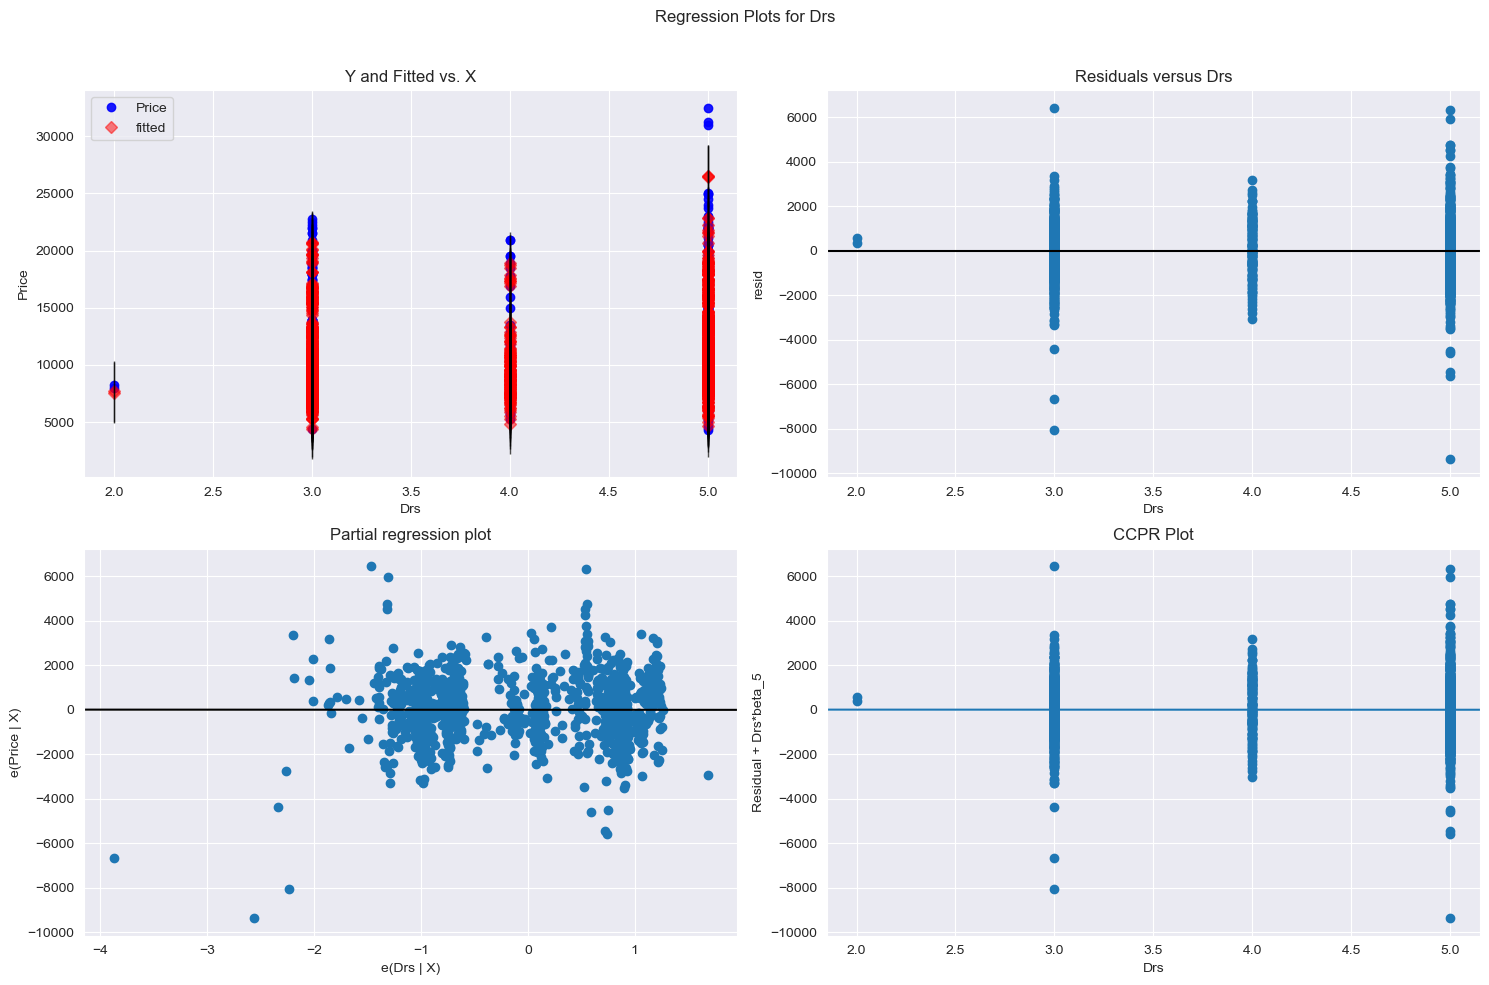

In [147]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"Drs", fig = fig)
plt.show()

eval_env: 1


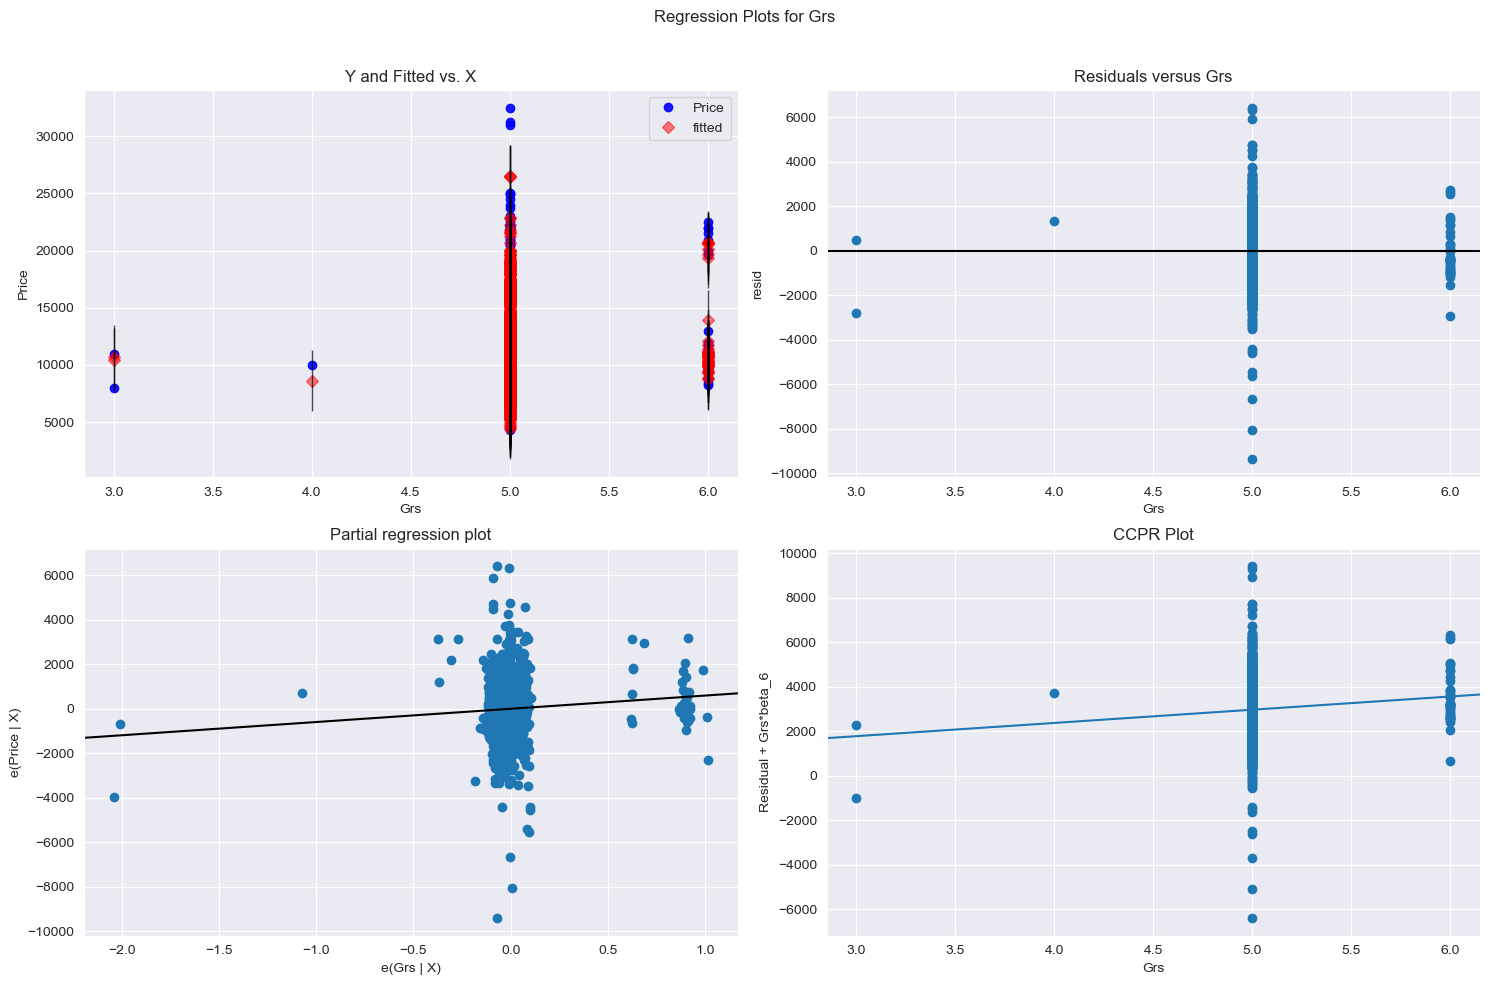

In [148]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"Grs", fig = fig)
plt.show()

eval_env: 1


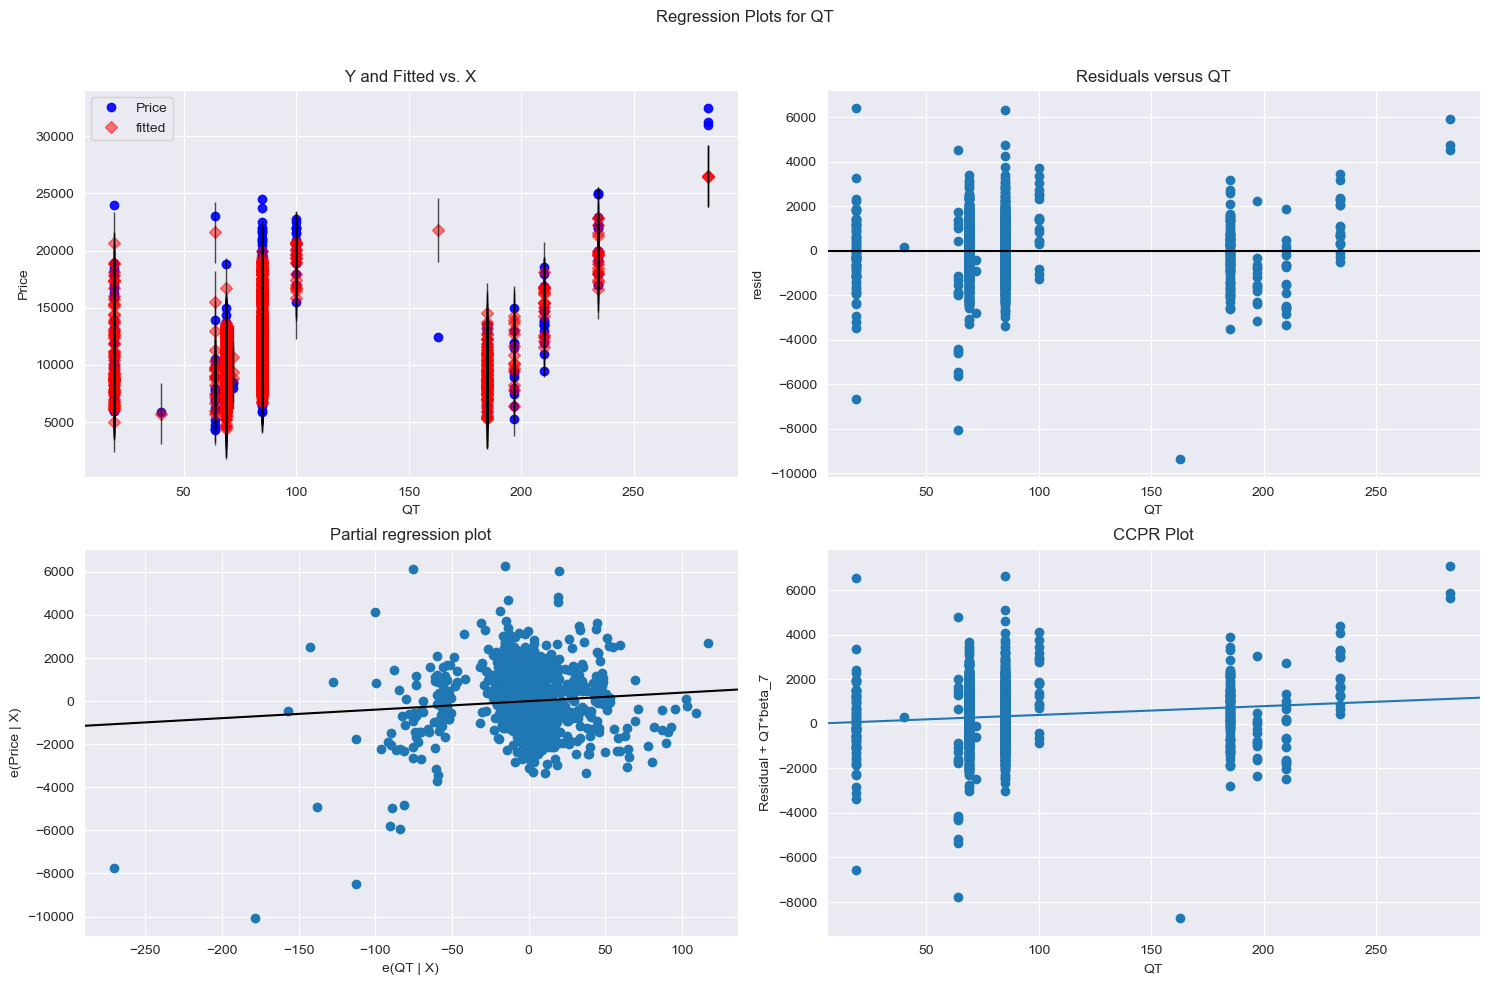

In [149]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"QT", fig = fig)
plt.show()

eval_env: 1


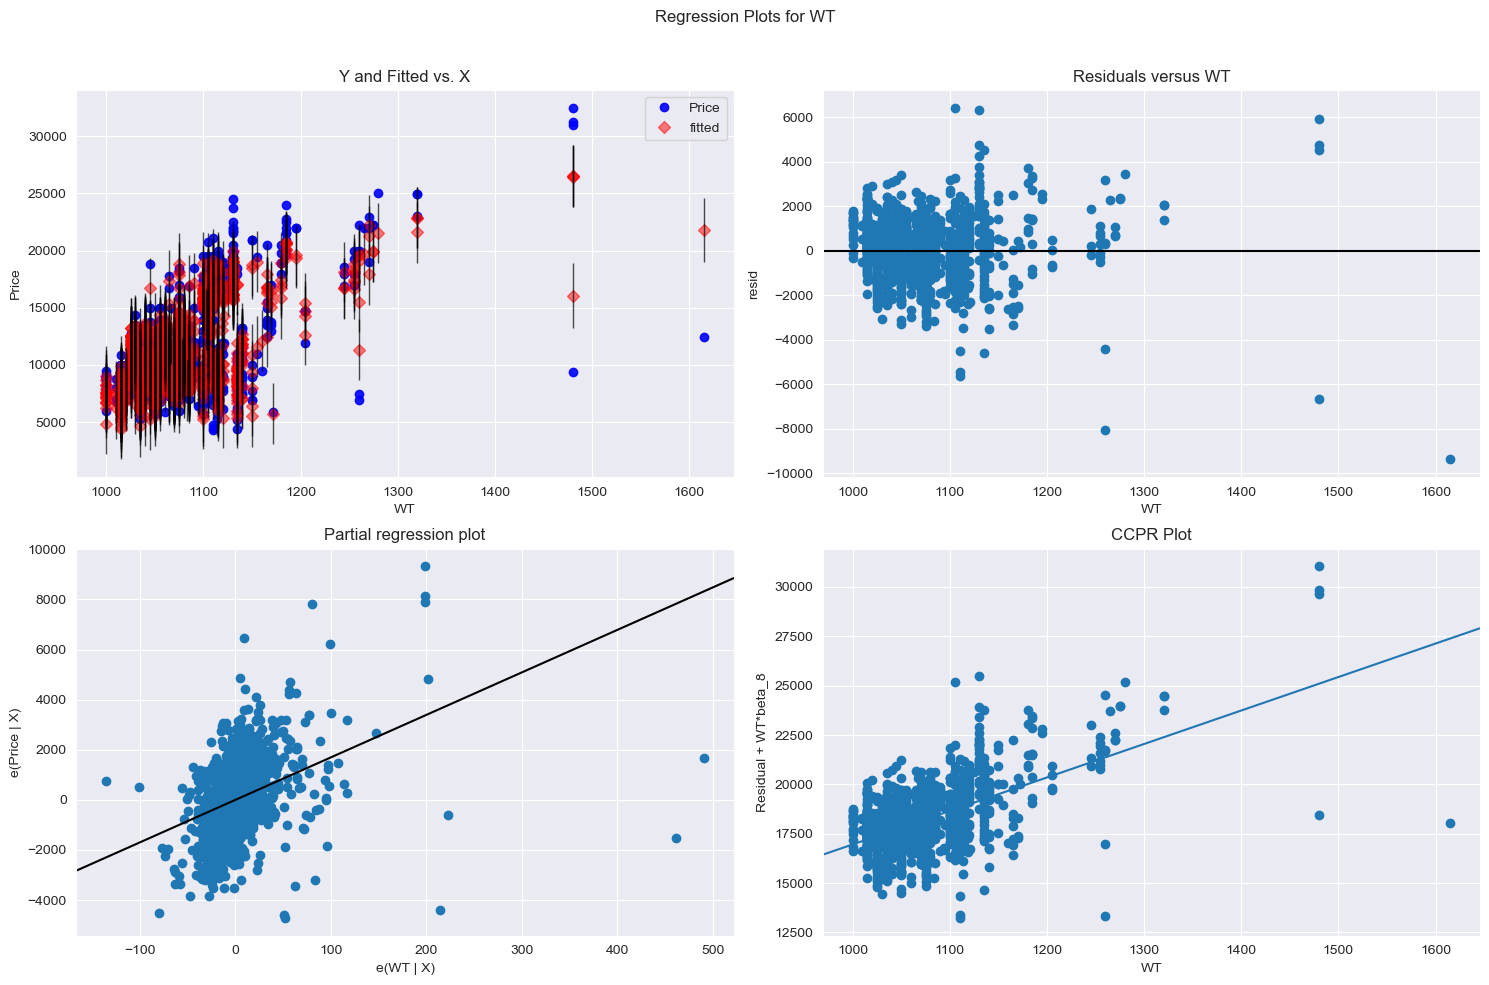

In [150]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"WT", fig = fig)
plt.show()

# Cook's Distance

In [151]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence_CC = model.get_influence()
(c_, _) = model_influence_CC.cooks_distance

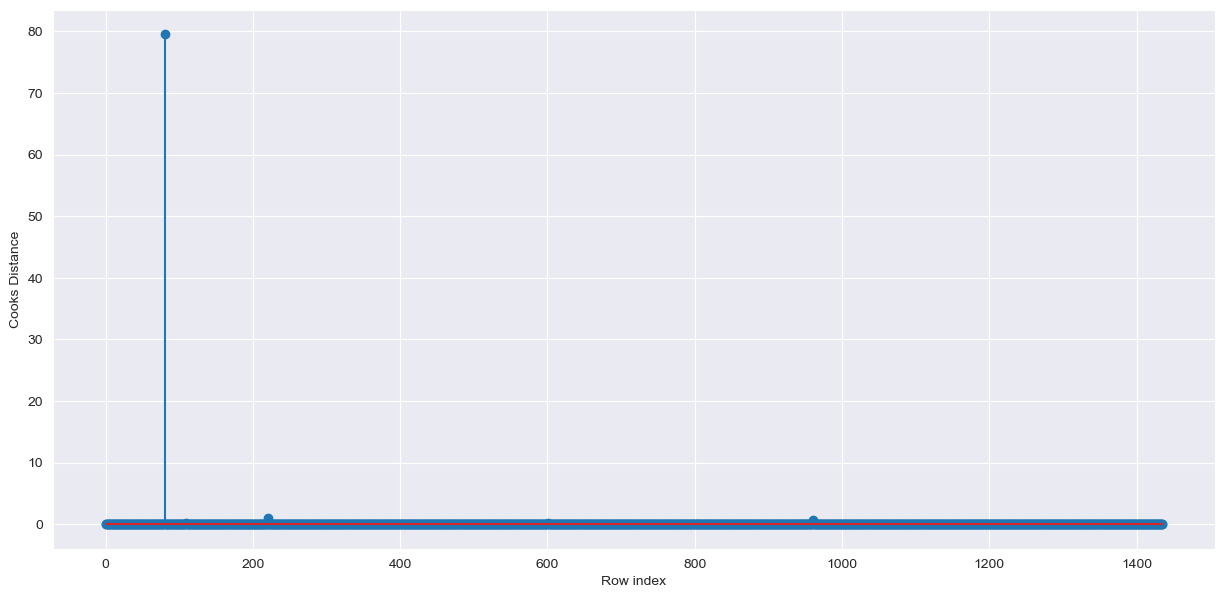

In [152]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(15, 7))
plt.stem(np.arange(len(data1)), np.round(c_, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [153]:
#index and value of influencer where c is more than .5
(np.argmax(c_),np.max(c_))

(80, 79.52010624138717)

# Leverage Value 

In [154]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

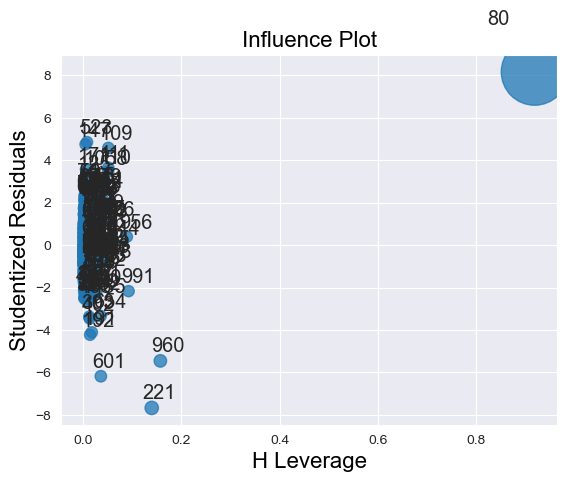

In [155]:
influence_plot(model)
plt.show()

In [156]:
data1[data1.index.isin([80])]

,Price,Age,KM,HP,CC,Drs,Grs,QT,WT
80,18950,25,20019,110,16000,5,5,100,1180


In [157]:
data2 = data1.drop(data1.index[80], axis=0).reset_index()
data2.drop(['index'], axis=1, inplace=True)
data2

,Price,Age,KM,HP,CC,Drs,Grs,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# Build Model

In [158]:
#Exclude variable "CC" and generate R-Squared and AIC values
final_drs = smf.ols('Price~Age+KM+HP+Drs+Grs+QT+WT',data = data2).fit()

In [159]:
(final_drs.rsquared, final_drs.aic, final_drs.bic)

(0.8631959819380925, 24751.649416173997, 24793.800777199547)

In [161]:
#Exclude variable "Drs" and generate R-Squared and AIC values
final_cc = smf.ols('Price~Age+KM+HP+CC+Grs+QT+WT',data = data2).fit()

In [162]:
(final_cc.rsquared, final_cc.aic, final_cc.bic)

(0.8693349475698541, 24685.765438793034, 24727.916799818584)

-  BY Comparing above R-Squared and AIC values, model 'final_cc' has high R- square and low AIC value 
  
  
   hence include variable 'CC' so that multi collinearity problem would be resolved.

# Cook's Distance

In [163]:
model_influence_cc = final_cc.get_influence()
(c_M, _) = model_influence_cc.cooks_distance

In [164]:
#index and value of influencer where c is more than .5
(np.argmax(c_M),np.max(c_M))

(220, 2.3034451664540634)

# Model Prediction

In [165]:
# New data for prediction
new_data=pd.DataFrame({"Drs":3,"Age":24,"KM":58651,"HP":88,"CC":1500,"Grs":5,"QT":100,"WT":1101},index=[1])
new_data

,Drs,Age,KM,HP,CC,Grs,QT,WT
1,3,24,58651,88,1500,5,100,1101


In [166]:
final_cc.predict(new_data)

1    15065.999373
dtype: float64

In [168]:
final_cc.predict(data2.iloc[0:9,])

0    16496.007474
1    16031.645211
2    16469.939626
3    16116.490065
4    15904.461841
5    15260.935726
6    16758.947904
7    16732.600622
8    20398.939147
dtype: float64

In [169]:
pred_y = final_cc.predict(data2)
pred_y

0       16496.007474
1       16031.645211
2       16469.939626
3       16116.490065
4       15904.461841
            ...     
1430     8951.852309
1431     8418.484540
1432     8574.443555
1433     8696.690631
1434     9986.846541
Length: 1435, dtype: float64

# Table containing R^2 value for each prepared model

In [170]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_cc.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.863763
1,Final_Model,0.869335
